In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu


In [249]:
df = pd.read_csv(r"C:\Users\mei88\Downloads\midterm_data.csv")

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [251]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [252]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [253]:
df['checkout_status'].astype('category')

0       0
1       0
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    1
4998    0
4999    1
Name: checkout_status, Length: 5000, dtype: category
Categories (2, int64): [0, 1]

In [254]:
df.duplicated().sum()

0

In [255]:
df.set_index('userID', inplace=True)

In [256]:
#check the missing value
df.isnull().sum()


age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64

Drop the NULL cells -total 130

In [257]:
df.drop(df[df['device'].isnull()].index, axis = 0, inplace =True)

In [258]:
df.drop(df[df['location'].isnull()].index, axis = 0, inplace =True)

In [259]:
df.describe(include='all')

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871,4871
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2522,1028
mean,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455,NaN,NaN
std,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778,NaN,NaN
min,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000,NaN,NaN
50%,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000,NaN,NaN
75%,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000,NaN,NaN


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sessions'}>,
        <Axes: title={'center': 'time_spent'}>],
       [<Axes: title={'center': 'pages_visited'}>,
        <Axes: title={'center': 'cart_items'}>,
        <Axes: title={'center': 'cart_value'}>],
       [<Axes: title={'center': 'checkout_status'}>, <Axes: >, <Axes: >]],
      dtype=object)

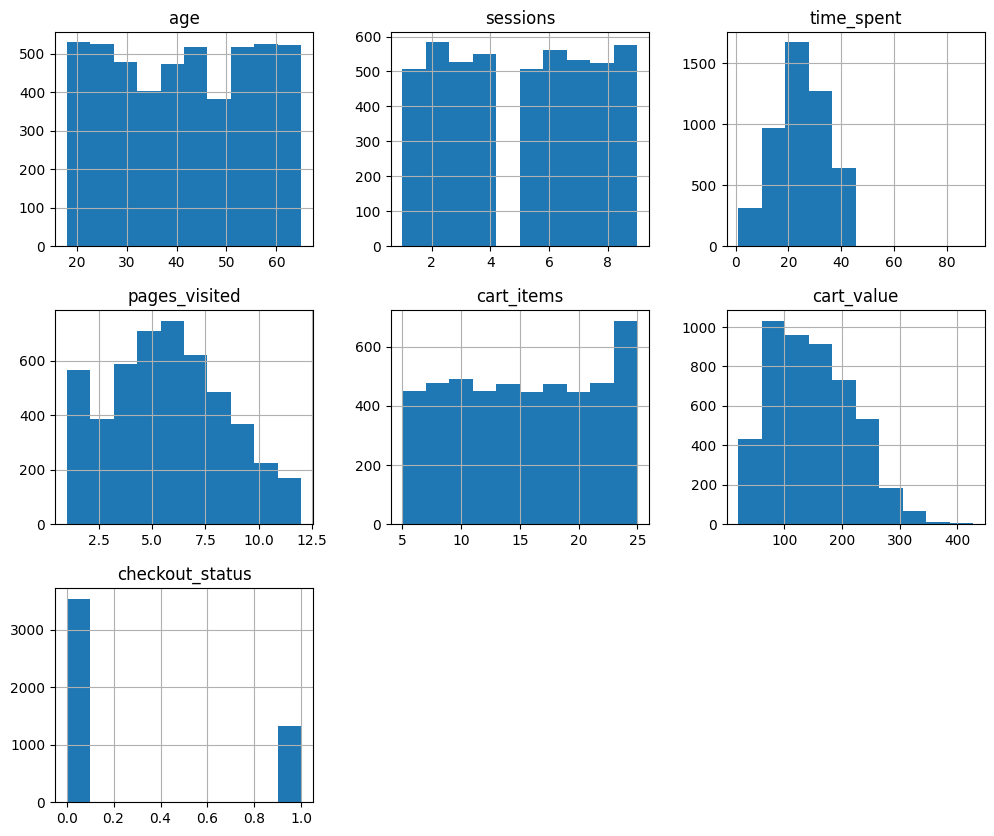

In [260]:
df.hist(figsize = (12,10))

we seperate the two groups first
#conduct the hypothesis test to see if the two groups have significant differenct.
if there is significant difference, then we will analysis the individaul variables. 

In [261]:
df.head()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
userID,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [262]:
df['device'].unique()

array(['Desktop', 'Tablet', 'Mobile'], dtype=object)

In [263]:
df['location'].unique()

array(['Location 1', 'Location 3', 'Location 4', 'Location 2',
       'Location 5'], dtype=object)

In [264]:
df.columns

Index(['age', 'sessions', 'time_spent', 'pages_visited', 'cart_items',
       'cart_value', 'checkout_status', 'device', 'location'],
      dtype='object')

first, we do some analhysis  to understand differences between users, we need to make sure the users are similar in behaviour. we use statistic tests to support our analysis 

In [265]:
# By location 
df.groupby('location')[['age', 'sessions', 'time_spent','pages_visited', 'cart_items', "cart_value",'checkout_status']].mean()

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
location,,,,,,,
Location 1,42.343685,4.982402,25.657852,5.840580,15.183230,152.872505,0.280538
Location 2,41.547009,4.923077,24.967337,5.752137,15.012821,149.232628,0.267094
Location 3,41.809619,5.014028,24.875527,5.702405,14.891784,147.684780,0.265531
Location 4,40.925097,5.047665,25.165525,5.785019,14.783074,147.568424,0.283074
Location 5,41.058324,5.149523,25.198461,5.809120,15.002121,150.127911,0.270414


T-test see if there is a significant difference betweent the two group

In [266]:
# check the age
checkout_group = df[df['checkout_status'] == 1]['age']
non_checkout_group = df[df['checkout_status'] == 0]['age']
t_stat, p_val =stats.ttest_ind(checkout_group, non_checkout_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -0.9083884951838309
P-value: 0.36371796039549453


we can conclude age does not have significant difference between two groups

In [267]:
# check the sessions
checkout_group = df[df['checkout_status'] == 1]['sessions']
non_checkout_group = df[df['checkout_status'] == 0]['sessions']
t_stat, p_val =stats.ttest_ind(checkout_group, non_checkout_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -1.3833807566385996
P-value: 0.16661157092305418


we can conclude sessions does not have significant difference between two groups

In [268]:
# check the time_spent
checkout_group = df[df['checkout_status'] == 1]['time_spent']
non_checkout_group = df[df['checkout_status'] == 0]['time_spent']
t_stat, p_val =stats.ttest_ind(checkout_group, non_checkout_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 29.01437884807354
P-value: 7.252646363809769e-171


Very small P-value, we can conclude 'time_spent' has significant difference

In [ ]:
# check the pages_visited
checkout_group = df[df['checkout_status'] == 1]['pages_visited']
non_checkout_group = df[df['checkout_status'] == 0]['pages_visited']
t_stat, p_val =stats.ttest_ind(checkout_group, non_checkout_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 27.061980794784017
P-value: 2.253044494394405e-150


In [ ]:
Very small P-value, we can conclude 'pages_visited' has significant difference

In [ ]:
# check the cart_items
checkout_group = df[df['checkout_status'] == 1]['cart_items']
non_checkout_group = df[df['checkout_status'] == 0]['cart_items']
t_stat, p_val =stats.ttest_ind(checkout_group, non_checkout_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -6.207198976955317
P-value: 5.841328477832585e-10


In [ ]:
Very small P-value, we can conclude 'cart_items' has significant difference

In [ ]:
# check the cart_value'
checkout_group = df[df['checkout_status'] == 1]['cart_value']
non_checkout_group = df[df['checkout_status'] == 0]['cart_value']
t_stat, p_val =stats.ttest_ind(checkout_group, non_checkout_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -5.58542237803329
P-value: 2.4580059099364027e-08


In [ ]:
Very small P-value, we can conclude 'cart_value' has significant difference

In [ ]:
# check the device using MannWhity 
checkout_group = df[df['checkout_status'] == 1]['cart_value']
non_checkout_group = df[df['checkout_status'] == 0]['cart_value']
U_stat, p_val = stats.mannwhitneyu(checkout_group, non_checkout_group)
H, pval = stats.kruskal(checkout_group, non_checkout_group)
print('The Test statistic: ', H)
print('The p_value of the test: ', pval)

The Test statistic:  11.89987766061614
The p_value of the test:  0.0005613763106774908


In [ ]:
Very small P-value, we can conclude 'device' has significant difference

In [ ]:
df['location'].unique()

array(['Location 1', 'Location 3', 'Location 4', 'Location 2',
       'Location 5'], dtype=object)

In [ ]:
# check the location using MannWhity 
checkout_group = df[df['checkout_status'] == 1]['location']
non_checkout_group = df[df['checkout_status'] == 0]['location']
U_stat, p_val = stats.mannwhitneyu(checkout_group, non_checkout_group)
H, pval = stats.kruskal(checkout_group, non_checkout_group)
print('The Test statistic: ', H)
print('The p_value of the test: ', pval)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
df.columns

Index(['age', 'sessions', 'time_spent', 'pages_visited', 'cart_items',
       'cart_value', 'checkout_status', 'device', 'location'],
      dtype='object')

Overall, two group of users have signfinicant difference on below variables "time_spent", " pages_visited" "cart_items" , " cart_value" and ' device" 

however, 'age',' sessions' do not have significant difference. 

In [ ]:
checkout_group = df[df['checkout_status'] == 1][['time_spent', 'pages_visited', 'cart_items', 'cart_value']].mean()
non_checkout_group =df[df['checkout_status'] == 0][['time_spent', 'pages_visited', 'cart_items', 'cart_value']].mean()


In [ ]:
comparison = pd.concat([checkout_group, non_checkout_group], axis=1)
comparison.columns = ['checkout_mean', 'non_checkout_mean']

In [ ]:
comparison

,checkout_mean,non_checkout_mean
time_spent,31.318157,22.858777
pages_visited,7.289790,5.208251
cart_items,14.096847,15.300367
cart_value,140.510871,152.827485


<Axes: >

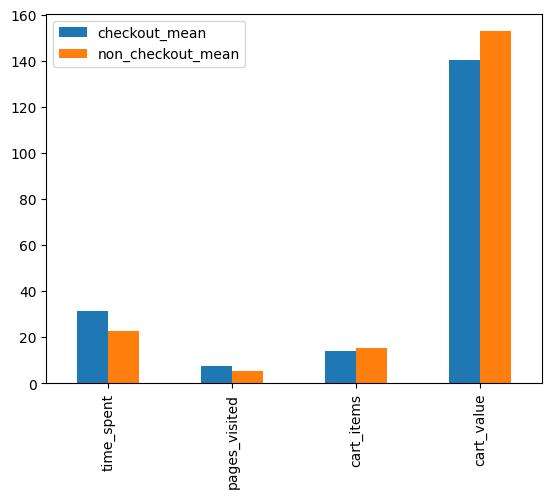

In [ ]:
comparison.plot(kind='bar')


In [ ]:
checkout_group_by_device = df[df['checkout_status'] == 1]['device']
non_checkout_group_by_device = df[df['checkout_status'] == 0]['device']

comparison = pd.concat([checkout_group_by_device.value_counts(), non_checkout_group_by_device.value_counts()], axis=1)
comparison.columns = ['checkout_count', 'non_checkout_count']
comparison['device'] = comparison.index




In [ ]:
comparison

,checkout_count,non_checkout_count,device
device,,,
Desktop,720,1802,Desktop
Mobile,374,1043,Mobile
Tablet,238,694,Tablet


<Axes: xlabel='device'>

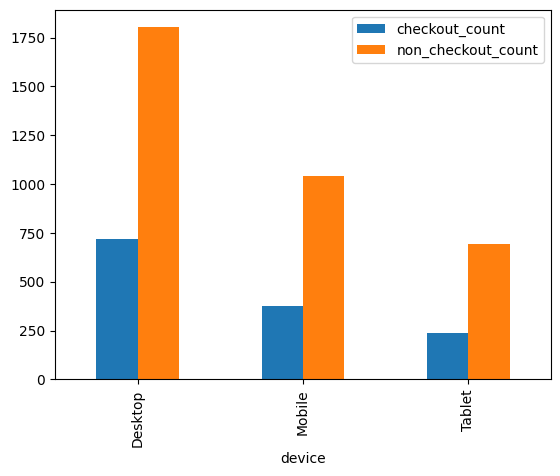

In [ ]:
comparison.plot(kind='bar')

we are using Chi square test to test categorical variable and validate the bar-chart 

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency


checkout_group_by_device = df[df['checkout_status'] == 1]['device']
non_checkout_group_by_device = df[df['checkout_status'] == 0]['device']

contingency_table = pd.crosstab(checkout_group_by_device, non_checkout_group_by_device)
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_val)


checkout_group_by_device = df[df['checkout_status'] == 1]['device']
non_checkout_group_by_device = df[df['checkout_status'] == 0]['device']

contingency_table = pd.crosstab(checkout_group_by_device, non_checkout_group_by_device)
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_val)


ValueError: No data; `observed` has size 0.


Data Cleaning:

We dropped the missing values (totally 130) , since it is comparable small numbers. 

we converted the data type of "checkout_status' as str

we checked the descriptoins of data, seems all good. 

we checked each variables' distribution using seaborn



Statistic Analhyis


 Step1 : we conducted T-statistic test on  each numericcal variable's relatinship with " checkout_status" to see if there is significant difference of them. 

    we conducted Chi-square-statistic test on   Categorial variable's relatinship with " checkout_status" to see if there is significant difference of them.  due to time limitation, I did not get time to test the 'location' variable yet, but it will be the same method . 
    
    For the categorical variable:

we used Chi-square test to validate the significance, for some reason, the result did not run out. but we can see from the newly created dataframe by device and the bar-chart , we can conclude:

the majority of the user are using desktop, however, this variable does not have significant difference between two groups. 

Conclusion

With P-value less then 0.05, we found  numerical variables" time_spent", ' page_visited, "cart_items', 'cart_value"  does have significant impact to the checkout status. 

Stepe2: then we analyized the difference of the each variables between two groups. through the bar-chart, we can tell:

Users' behaviour characteristics between two groups


For the checkout user group, they spent more time , visited more pages, however, they have less items in cart and the value in carts are less than non_check out group

On the other hand, the non_checkout user group, they spent less time, visited less pages, but they have more items in cart and the value in cart are higher. 



Recomendation:

experimentation can be focus on stategis to attract user's time spending on our webpage, attract them clicking more pages. avoid promoting unfordable or expensive items to users.  focus on less expensive products to promote. 



